In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Set global font size
plt.rcParams.update({
    'font.size': 16,  # Adjust this to your preferred size
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

In [3]:
file_path = '../1_scraping/FullText_ALL.csv'
FullText_df = pd.read_csv(file_path)
FullText_df.head()

,Unnamed: 0,ID,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Full_Text
0,0,0,10 Automated Face Analysis for Affective Compu...,"['JF Cohn', 'F De la Torre']",2015,170,Affective Faces Database,classifier,Differences in manual coding between databases...,The Oxford handbook of affective …,https://academic.oup.com/edited-volume/28057/c...,NaN
1,1,1,3D facial expression recognition based on auto...,"['H Tang', 'TS Huang']",2008,205,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",facial expression recognition from 3D facial s...,… on computer vision and pattern recognition …,https://ieeexplore.ieee.org/document/4563052,3D Facial Expression Recognition Based on Auto...
2,2,2,3D facial expression recognition based on prim...,"['J Wang', 'L Yin', 'X Wei', 'Y Sun']",2006,440,Binghamton University 3D Facial Expression,facial expression recognition,expressions using 3D facial expression range d...,… Vision and Pattern Recognition …,https://ieeexplore.ieee.org/document/1640921,3D Facial Expression Recognition Based on Prim...
3,3,3,3D facial expression recognition based on prop...,"['H Tang', 'TS Huang']",2008,153,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",Binghamton University have recently constructe...,… on Automatic Face & Gesture Recognition,https://ieeexplore.ieee.org/document/4813304,3DFacial Expr ession Recognition Based onPrope...
4,4,4,3D facial expression recognition using SIFT de...,"['S Berretti', 'B Ben Amor', 'M Daoudi', 'A De...",2011,184,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",at the Binghamton University (BU-3DFE database...,The Visual Computer,https://www.researchgate.net/publication/22006...,NaN


In [4]:
df = FullText_df.copy()

def clean_text(text):
    # Return NaN if text is empty or placeholder
    if text is np.nan or text == "Nothing found":
        return np.nan

    # Remove common metadata patterns and unwanted sections
    # Adjust regex patterns based on your files' content
    text = re.sub(r'\b(References|Cited by|Acknowledgments|Table of Contents|Outline|Figure \d+|Table \d+|DOI: .*)', '', text, flags=re.IGNORECASE)
    text = re.sub(r'##?\s?Title:.*?\n', '', text)  # Remove lines that start with '## Title:'
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs

    # Remove special characters and multiple spaces
    text = re.sub(r'\n+', ' ', text)  # Replace newlines with space
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\s*Figure\s*\d+\s*', '', text)  # Remove figure references
    text = re.sub(r'\s*Table\s*\d+\s*', '', text)  # Remove table references

    # Trim any leading or trailing whitespace
    text = text.strip()
    
    # Remove line breaks and excessive whitespace
    text = re.sub(r'\s+', ' ', text)

    return text

# Apply the cleaning function to the Full_Text column
df['Full_Text'] = df['Full_Text'].apply(clean_text)

# Display the cleaned texts
df.head()


,Unnamed: 0,ID,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Full_Text
0,0,0,10 Automated Face Analysis for Affective Compu...,"['JF Cohn', 'F De la Torre']",2015,170,Affective Faces Database,classifier,Differences in manual coding between databases...,The Oxford handbook of affective …,https://academic.oup.com/edited-volume/28057/c...,NaN
1,1,1,3D facial expression recognition based on auto...,"['H Tang', 'TS Huang']",2008,205,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",facial expression recognition from 3D facial s...,… on computer vision and pattern recognition …,https://ieeexplore.ieee.org/document/4563052,3D Facial Expression Recognition Based on Auto...
2,2,2,3D facial expression recognition based on prim...,"['J Wang', 'L Yin', 'X Wei', 'Y Sun']",2006,440,Binghamton University 3D Facial Expression,facial expression recognition,expressions using 3D facial expression range d...,… Vision and Pattern Recognition …,https://ieeexplore.ieee.org/document/1640921,3D Facial Expression Recognition Based on Prim...
3,3,3,3D facial expression recognition based on prop...,"['H Tang', 'TS Huang']",2008,153,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",Binghamton University have recently constructe...,… on Automatic Face & Gesture Recognition,https://ieeexplore.ieee.org/document/4813304,3DFacial Expr ession Recognition Based onPrope...
4,4,4,3D facial expression recognition using SIFT de...,"['S Berretti', 'B Ben Amor', 'M Daoudi', 'A De...",2011,184,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",at the Binghamton University (BU-3DFE database...,The Visual Computer,https://www.researchgate.net/publication/22006...,NaN


C:\Users\liter\AppData\Local\Temp\ipykernel_20056\468863222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['Text_Length'] = df_no_nan['Full_Text'].apply(len)


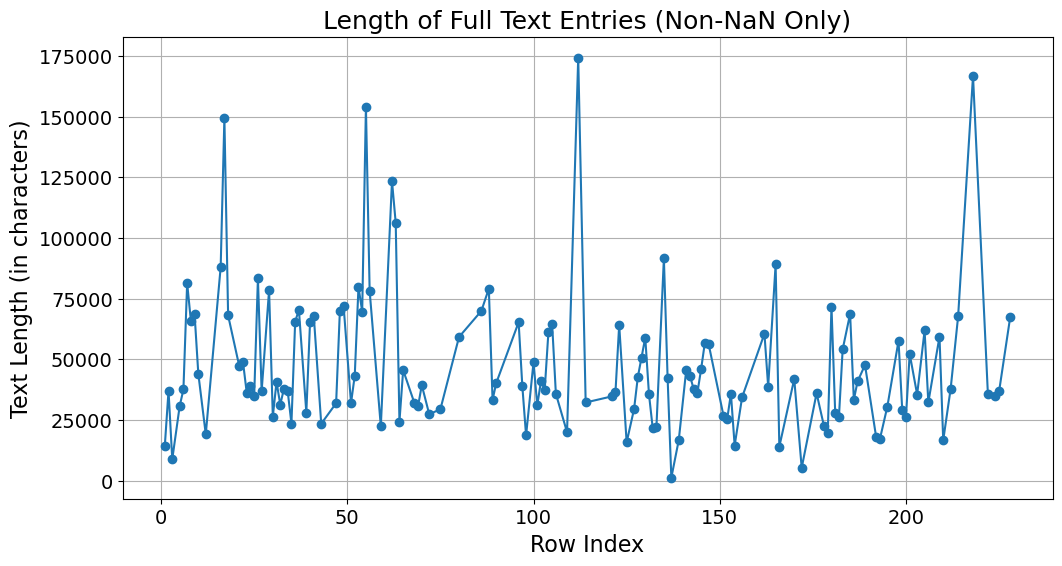

In [5]:
df_no_nan = df.dropna(subset=['Full_Text'])
df_no_nan['Text_Length'] = df_no_nan['Full_Text'].apply(len)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_no_nan.index, df_no_nan['Text_Length'], marker='o', linestyle='-')
plt.title('Length of Full Text Entries (Non-NaN Only)')
plt.xlabel('Row Index')
plt.ylabel('Text Length (in characters)')
plt.grid(True)
plt.show()

In [6]:
# Filter rows in df_no_nan where the length of 'Full_Text' is zero
empty_text_rows = df_no_nan[df_no_nan['Text_Length'] <= 10000]

# Display the filtered rows
empty_text_rows

,Unnamed: 0,ID,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Full_Text,Text_Length
3,3,3,3D facial expression recognition based on prop...,"['H Tang', 'TS Huang']",2008,153,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",Binghamton University have recently constructe...,… on Automatic Face & Gesture Recognition,https://ieeexplore.ieee.org/document/4813304,3DFacial Expr ession Recognition Based onPrope...,8779
137,137,139,Facial expression recognition: A survey,"['Y Huang', 'F Chen', 'S Lv', 'X Wang']",2019,189,"Binghamton University 3D Facial Expression, Ja...",FER,-of-the-art FER approaches are presented and a...,Symmetry,https://www.sciencedirect.com/science/article/...,Search ## 1. Abstract 2. 3. Keywords 4. ## (14...,1219
172,172,174,Machine learning models that remember too much,"['C Song', 'T Ristenpart', 'V Shmatikov']",2017,622,Toronto Face Database,machine learning,a machine learning pipeline consists of severa...,Proceedings of the 2017 ACM …,https://arxiv.org/abs/1709.07886,Machine Learning Models that Remember Too Much...,5282


In [7]:
df_no_nan = df_no_nan.drop(['Unnamed: 0', 'ID', 'Text_Length'], axis= 1)
df_no_nan.shape

(133, 10)

In [8]:
df_no_nan.columns

Index(['Title', 'Authors', 'Year', 'Cited By', 'Detected_Dataset',
       'Detected_Topic', 'Abstract', 'Journal', 'URL', 'Full_Text'],
      dtype='object')

In [9]:
df[df.duplicated(subset=['Title'], keep=False)]

,Unnamed: 0,ID,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Full_Text


In [10]:
df['Detected_Dataset'].unique()

array(['Affective Faces Database',
       'Binghamton University 3D Facial Expression',
       'Acted Facial Expressions In The Wild, Extended Cohn-Kanade, Static Facial Expression in the Wild',
       'Affective Faces Database, MMI Facial Expression',
       'Extended Cohn-Kanade', 'Japanese Female Facial Expression',
       'Acted Facial Expressions In The Wild, Affective Faces Database, Static Facial Expression in the Wild',
       'Binghamton University 3D Facial Expression, MMI Facial Expression',
       'Toronto Face Database',
       'Acted Facial Expressions In The Wild, Static Facial Expression in the Wild',
       'Affective Faces Database, Expression in-the-Wild',
       'CMU Multi-PIE, MMI Facial Expression',
       'Extended Cohn-Kanade, Radboud Faces Database',
       'Affective Faces Database, Radboud Faces Database',
       'Expression in-the-Wild',
       'Acted Facial Expressions In The Wild, Affective Faces Database',
       'Acted Facial Expressions In The Wild, Aff

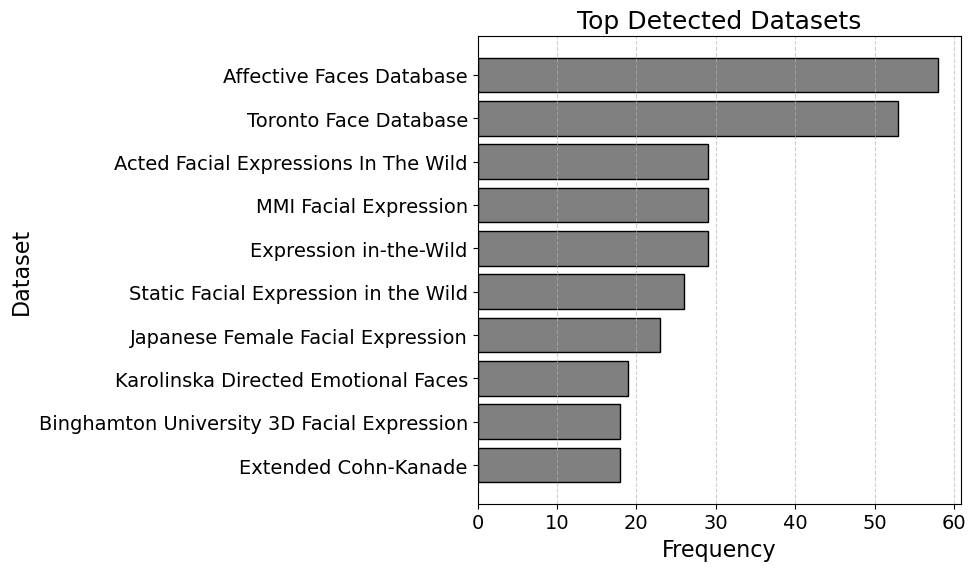

In [11]:
# Function to count and plot individual datasets
def plot_individual_datasets(df, column='Detected_Dataset', top_n=20, save_path='top_datasets.pdf'):
    # Split the column values by commas and flatten into a single list
    all_datasets = []
    df[column].dropna().apply(lambda x: all_datasets.extend(x.split(', ')))
    
    # Count occurrences of each dataset
    dataset_counts = Counter(all_datasets)
    most_common_datasets = dataset_counts.most_common(top_n)
    
    # Prepare data for plotting
    datasets, counts = zip(*most_common_datasets)
    
    # Plot the top detected datasets
    plt.figure(figsize=(10, 6))
    plt.barh(datasets, counts, color="gray", edgecolor="black")
    plt.title("Top Detected Datasets")
    plt.xlabel("Frequency")
    plt.ylabel("Dataset")
    plt.gca().invert_yaxis()  # To display the most frequent dataset at the top
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Save the plot to a PDF file
    plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

plot_individual_datasets(df, column='Detected_Dataset', top_n=10, save_path='top_detected_datasets.pdf')




In [12]:
# from the new paper: https://arxiv.org/abs/2410.22506

import pandas as pd

# Data for the table
data = {
    "Model": ["ResNet-50", "ResNet-50", "EfficientNet-B3", "XceptionNet", "Ensemble"],
    "Emotion Class": ["Happy", "Sad", "Fear", "Disgust", "Contempt"],
    "Accuracy (%)": [85.86, 67.00, 88.62, 91.47, 78.51],
    "Methodology": ["Hard-FER (Easy)", "AU-Based Classifier", "Binary Classifiers", "Binary Classifiers", "Binary Classifiers"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("affectnet_accuracy.csv", index=False)


In [13]:
df

,Model,Emotion Class,Accuracy (%),Methodology
0,ResNet-50,Happy,85.86,Hard-FER (Easy)
1,ResNet-50,Sad,67.00,AU-Based Classifier
2,EfficientNet-B3,Fear,88.62,Binary Classifiers
3,XceptionNet,Disgust,91.47,Binary Classifiers
4,Ensemble,Contempt,78.51,Binary Classifiers


In [14]:
file_path = 'FER_Accuracy_Table.csv'
ACC_df = pd.read_csv(file_path)
ACC_df.head()

,Datasets,Method,Network Type,Network Size,Pre-processing,Data Selection,Data Group,Additional Classifier,Performance (%)
0,CK+,Ouellet 14 [110],CNN (AlexNet),-,-,V&J,the last frame,LOSO,SVM 7 classes†: (94.4)
1,CK+,Li et al. 15 [86],RBM,4,-,V&J,-,IN,6 classes: 96.8
2,CK+,Liu et al. 14 [13],DBN CN,6,2m,-,-,8 folds,AdaBoost 6 classes: 96.7
3,CK+,Liu et al. 13 [137],"CNN, RBM CN",5,-,V&J,-,10 folds,SVM 8 classes: 92.05 (87.67)
4,CK+,Liu et al. 15 [138],"CNN, RBM CN",5,-,V&J,-,10 folds,SVM 7 classes‡: 93.70


In [15]:
def extract_floats_as_accuracy(df, performance_column='Performance (%)', new_column='Accuracy'):
    # Extract only floating-point numbers (e.g., 94.4, 87.67)
    df[new_column] = df[performance_column].str.extract(r'(\d+\.\d+)').astype(float)
    return df

# Apply the function to your DataFrame
ACC_df = extract_floats_as_accuracy(ACC_df, performance_column='Performance (%)', new_column='Accuracy')
ACC_df.head()

,Datasets,Method,Network Type,Network Size,Pre-processing,Data Selection,Data Group,Additional Classifier,Performance (%),Accuracy
0,CK+,Ouellet 14 [110],CNN (AlexNet),-,-,V&J,the last frame,LOSO,SVM 7 classes†: (94.4),94.40
1,CK+,Li et al. 15 [86],RBM,4,-,V&J,-,IN,6 classes: 96.8,96.80
2,CK+,Liu et al. 14 [13],DBN CN,6,2m,-,-,8 folds,AdaBoost 6 classes: 96.7,96.70
3,CK+,Liu et al. 13 [137],"CNN, RBM CN",5,-,V&J,-,10 folds,SVM 8 classes: 92.05 (87.67),92.05
4,CK+,Liu et al. 15 [138],"CNN, RBM CN",5,-,V&J,-,10 folds,SVM 7 classes‡: 93.70,93.70


In [16]:
ACC_df['Datasets'].unique()

array(['CK+', 'JAFFE', 'MMI', 'TFD', 'FER 2013', 'SFEW 2.0'], dtype=object)

In [17]:
new_df = df 

new_df['Datasets'] = 'AffectNet+'

# Combine existing and new datasets into a single table with dataset names and accuracy values
combined_table = pd.concat([
    ACC_df[['Datasets', 'Accuracy']],
    new_df.rename(columns={"Accuracy (%)": "Accuracy"})[['Datasets', 'Accuracy']]
], ignore_index=True)

# Save to a CSV file
combined_table.to_csv("combined_datasets_accuracy.csv", index=False)

# Display the combined table
combined_table.head()


,Datasets,Accuracy
0,CK+,94.40
1,CK+,96.80
2,CK+,96.70
3,CK+,92.05
4,CK+,93.70


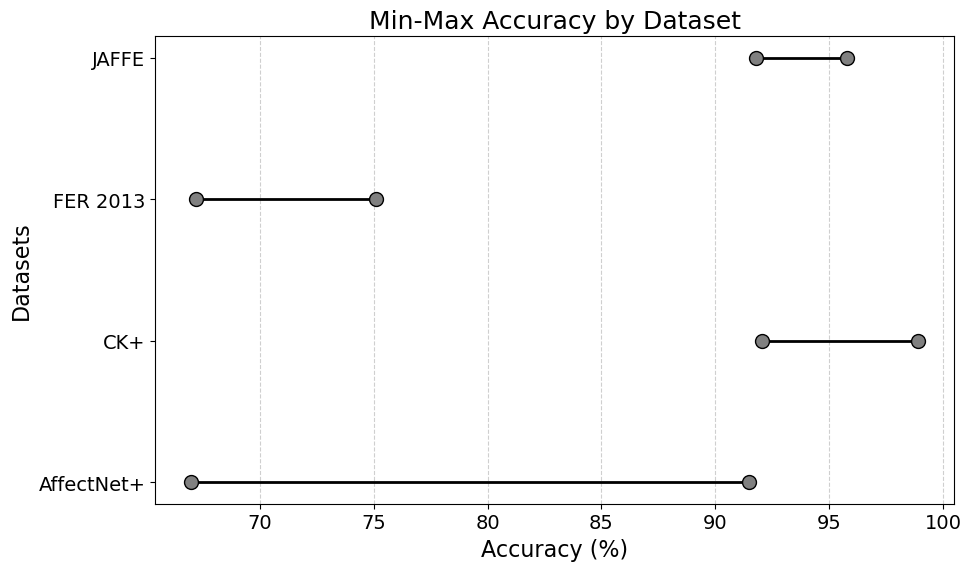

In [18]:
def plot_min_max_accuracy_with_styling(df, selected_datasets, save_path="min_max_accuracy_styled.pdf"):
    # Filter the DataFrame to include only the selected datasets
    df_filtered = df[df['Datasets'].isin(selected_datasets)]
    
    # Group by dataset and calculate min and max accuracy
    grouped = df_filtered.groupby('Datasets')['Accuracy'].agg(['min', 'max']).reset_index()
    
    # Plot the min-max accuracy for each dataset
    plt.figure(figsize=(10, 6))
    for index, row in grouped.iterrows():
        # Draw the min-max line
        plt.plot([row['min'], row['max']], [row['Datasets'], row['Datasets']], 
                 color='black', linewidth=2)
        
        # Draw circles for min and max points with black border and gray fill
        plt.scatter([row['min'], row['max']], [row['Datasets'], row['Datasets']], 
                    color='gray', edgecolor='black', s=100, zorder=3)
    
    # Add labels and styling
    plt.title("Min-Max Accuracy by Dataset")
    plt.xlabel("Accuracy (%)")
    plt.ylabel("Datasets")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Save to PDF
    plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
selected_datasets = ['CK+', 'JAFFE', 'FER 2013', 'AffectNet+']
plot_min_max_accuracy_with_styling(combined_table, selected_datasets, save_path="min_max_accuracy_styled.pdf")
